In [1]:
#Importando librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [2]:
#Abriendo mi archivo de datos
dat=open("/Users/karytzamontiel/Documents/Maestria UNAM/Machine Learning/Perceptron/datos.txt")
df=pd.read_csv(dat,sep="\s+")
df.columns =["X1","X2", "Valor"]
print(df)

      X1    X2  Valor
0   2.10  3.12     -1
1   1.95  3.01     -1
2   2.04  2.99     -1
3   2.21  2.98     -1
4   2.12  3.00     -1
5   2.18  3.32     -1
6   2.15  3.02     -1
7   2.45  3.06     -1
8   2.34  3.39     -1
9   2.51  3.21     -1
10  8.21  9.23      1
11  8.00  9.67      1
12  8.03  9.00      1
13  8.50  8.99      1
14  8.34  9.50      1
15  8.98  9.79      1
16  8.04  9.73      1
17  8.29  9.02      1
18  8.07  9.45      1
19  8.42  9.08      1


In [3]:
intf = df.iloc[0:10]
print(intf)

     X1    X2  Valor
0  2.10  3.12     -1
1  1.95  3.01     -1
2  2.04  2.99     -1
3  2.21  2.98     -1
4  2.12  3.00     -1
5  2.18  3.32     -1
6  2.15  3.02     -1
7  2.45  3.06     -1
8  2.34  3.39     -1
9  2.51  3.21     -1


In [4]:
#datos sin usar
intf1 = df.iloc[10:20]
print(intf1)

      X1    X2  Valor
10  8.21  9.23      1
11  8.00  9.67      1
12  8.03  9.00      1
13  8.50  8.99      1
14  8.34  9.50      1
15  8.98  9.79      1
16  8.04  9.73      1
17  8.29  9.02      1
18  8.07  9.45      1
19  8.42  9.08      1


In [5]:
#Convirtiendo cada columna del dataframe en array
x1=np.array (intf["X1"])
x2=np.array (intf["X2"])
valor=np.array(intf["Valor"]) 
#valor2=np.array(intf["Valor2"])
#sin_usar=np.array(intf1["X1"])
print(x1)
print(x2)
print(valor)
#print(sin_usar)

[2.1  1.95 2.04 2.21 2.12 2.18 2.15 2.45 2.34 2.51]
[3.12 3.01 2.99 2.98 3.   3.32 3.02 3.06 3.39 3.21]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [6]:
x_1=np.array (intf1["X1"])
x_2=np.array (intf1["X2"])
valor1=np.array(intf["Valor"])

print(x_1)
print(x_2)
print(valor1)

[8.21 8.   8.03 8.5  8.34 8.98 8.04 8.29 8.07 8.42]
[9.23 9.67 9.   8.99 9.5  9.79 9.73 9.02 9.45 9.08]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [7]:
#normalizando datos
#normalized_x1 = x1 / np.linalg.norm(x1)
#normalized_x2 = x2 / np.linalg.norm(x2)
#normalized_x = x1 / np.linalg.norm(sin_usar)

#normalized_valor = valor / np.linalg.norm(valor)


#print(normalized_x1)
#print(normalized_x2)
#print(normalized_x)
#print(normalized_valor)


In [8]:
# Combina los datos y las etiquetas en una lista
data = list(zip(x1, x2, x_1, x_2, valor, valor1))

# Mezcla los datos de forma aleatoria
random.shuffle(data)

# Separa los datos
#ahora "normalized_x1_shuffled" son los datos seleccionados de manera aleatoria para los datos de x1
#ahora "normalized_x2_shuffled" son los datos seleccionados de manera aleatoria para los datos de x2
    #con estos nuevos datos se entrenará el perceptron
x1_shuffled, x2_shuffled, valor_shuffled, x_1_shuffled, x_2_shuffled, valor1_shuffled = zip(*data)

In [9]:
print(type(x1))
print(type(x1_shuffled))

<class 'numpy.ndarray'>
<class 'tuple'>


In [10]:
x1_shuffled = np.asarray(x1) 
x2_shuffled = np.asarray(x2)

x_1_shuffled = np.asarray(x_1) 
x_2_shuffled = np.asarray(x_2)


print(type(x1_shuffled))
print(type(x2_shuffled))
print(type(x_1_shuffled))
print(type(x_2_shuffled))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


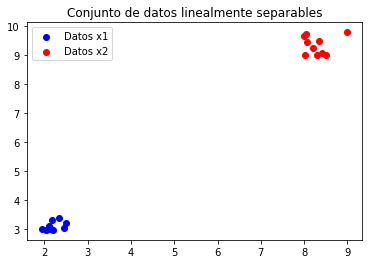

In [11]:
fig, ax = plt.subplots()

#scatter grafica un diagrama de puntos

#plt.scatter(x1_shuffled[:, 0], x2_shuffled[:,1], color='blue', label="Datos x1")
            #,x1[:,1], color='blue', label="Datos x1") 

plt.scatter(x1_shuffled, x2_shuffled, color="blue", label='Datos x1')
plt.scatter(x_1_shuffled, x_2_shuffled, color="red", label='Datos x2')
#plt.scatter(x2_shuffled, color="red", label='Datos x2')
    
#plt.scatter(x2_shuffled[:,0], x2_shuffled[:,1], color='red', label="Datos x2")
            #,x2[:,1], color='red', label="Datos x2")
plt.title('Conjunto de datos linealmente separables')
plt.legend()
plt.show()

In [12]:
#Definimos los pesos en cero

pesos = [0.00, 0.00]

In [13]:
#Definimos el bias igual a cero

bias = 0

In [14]:
#Definimos la función escalón:
    #regresa 1 si la entrada es mayor o igual a 0
    #regresa 0 en cualquier otro caso

def activacion_fn(x):
    return 1 if x >= 0 else -1

In [15]:
#Definimos la función que toma los datos, los pesos, el bias y utilizando la función de activación anteriormente
#definida, para dar una predicción de que tipo de dato es.

def perceptron(X, pesos, bias):
    suma = bias 
    for i in range(len(pesos)):
        suma += X[i] * pesos[i] #Aquí se calcula el producto de cada dato por el peso y se suma el bias
    return activacion_fn(suma) #La función de activación determinará el tipo de dato
                                #segun el valor de la variable "suma". Si "suma" es mayor o igual a cero, 
                                #la función de activación devolverá 1. De lo contrario, va a devolver 0, 
                                #lo que significa que pertenece a una clase negativa o -1.
    

In [16]:
#Definimos las épocas
epocas = 100

#Definimos la magnitud con la que ajustará los pesos
learning_rate = 0.1

In [17]:
#error_salida=[]

#def calcular_error_prueba(x_1_shuffled, pesos, bias, valor1):
#    e_out = 0  # Inicializamos el contador de errores de prueba.
    
#    for i in range(len(x_1_shuffled)):
#        prediccion = perceptron([x_1_shuffled[i],x_2_shuffled[1]], pesos, bias)  # Se realiza una predicción para el dato de prueba.
#        if prediccion != valor1[i]:  # Se compara la predicción con el valor esperado.
#            e_out += 1  # Si la predicción es incorrecta, se incrementa el contador de errores.
    
#    return e_out


#e_out = calcular_error_prueba(x_1_shuffled, pesos, bias, valor1) 
#print(e_out)
#error_salida.append(e_out)

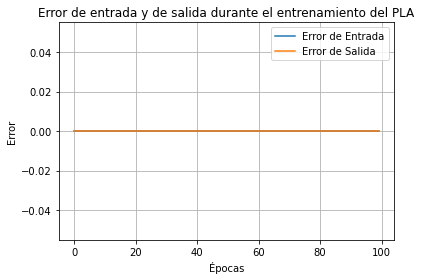

In [30]:
#bias=0
#pesos=[0.00,0.00]

error_entrada = []
error_salida = []

#Iterando sobre los datos en cada una de las epocas para actualizar los pesos.
for _ in range(epocas):
    
    e_in = 0
    #e_out = 0
    
    for i in range(len(x1_shuffled)):
        # Predicción y cálculo del error para el primer conjunto de datos, de aquí se ajustan los pesos segun el error
        #Se hacen predicciones para cada uno de los conjuntos de datos
        prediccion = perceptron([x1_shuffled[i],x2_shuffled[i]], pesos, bias) #calcular salida
        error = valor[i] - prediccion    #Se calcula el error comparando el verdadero valor del dato con 
                                            #la predicción
        
        if prediccion != valor[i]: 
            
        #prediccion2 = perceptron(normalized_x2_shuffled[i], pesos, bias)
        #error2 = valor[i] - prediccion2
        
        #Aquí se actualizan los pesos y el bias sumandole el producto de learning_rate con el error calculado
        #para cada uno de los datos
            for j in range(len(pesos)):
                 pesos[j] += learning_rate * (error * x1_shuffled[i])
            bias += learning_rate * (error) #actualizando el bias
            e_in += 1
        
    #return e_in
    
    error_entrada.append(e_in)
    #print(e_in)

    def calcular_error_prueba(x_1_shuffled, pesos, bias, valor1):
        e_out = 0  # Inicializamos el contador de errores de prueba.
    
        for i in range(len(x_1_shuffled)):
                prediccion1 = perceptron([x_1_shuffled[i],x_2_shuffled[1]], pesos, bias)  # Se realiza una predicción para el dato de prueba.
                if prediccion1 != valor1[i]:  # Se compara la predicción con el valor esperado.
                    e_out += 1  # Si la predicción es incorrecta, se incrementa el contador de errores.
    
        return e_out


    e_out = calcular_error_prueba(x_1_shuffled, pesos, bias, valor1) 
    #print(e_out)
    error_salida.append(e_out)
        
#print(error_entrada)
#print(error_salida)
    
#Graficando   
plt.plot([i for i in range(epocas)], error_entrada, label='Error de Entrada')
plt.plot([i for i in range(epocas)], error_salida, label='Error de Salida')

plt.xlabel('Épocas')
plt.ylabel('Error')
plt.title('Error de entrada y de salida durante el entrenamiento del PLA')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
#Resultado de los pesos y el bias
print("Pesos finales:", pesos)
print("b:", bias)

Pesos finales: [-0.42000000000000004, -0.42000000000000004]
b: -0.2


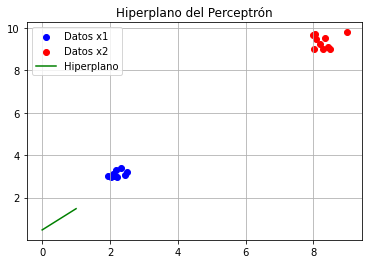

In [20]:
## Pesos y bias resultantes del entrenamiento del perceptrón
pesos = [-0.42000000000000004, -0.42000000000000004]  # Los pesos pueden variar dependiendo del entrenamiento
bias =  -0.2 # El sesgo puede variar dependiendo del entrenamiento

#Función de predicción
#def perceptron(X):
#    z = bias + np.dot(X, pesos)
#    return np.where(z >= 0, 1, 0)

# Graficar los datos 

plt.scatter(x1_shuffled, x2_shuffled, color="blue", label='Datos x1')
plt.scatter(x_1_shuffled, x_2_shuffled, color="red", label='Datos x2')

#plt.scatter(normalized_x1[:, 0], normalized_x1[:, 1], color='blue', label="Datos normalizados x1")
#plt.scatter(normalized_x2[:, 0], normalized_x2[:, 1], color='red', label="Datos normalizados x2")

# Graficar el hiperplano 
x_values = np.linspace(0, 1, 100)
valor_values = (bias + pesos[0] * x_values) / pesos[1]
plt.plot(x_values, valor_values, color='green', linestyle='-', label='Hiperplano')

plt.title("Hiperplano del Perceptrón")
plt.legend()
plt.grid(True)
plt.show()